In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.python.client import device_lib

In [ ]:
print('TensorFlow version: '  + tf.__version__ + '\n')
print('GPU Availability: '    + str(tf.test.is_gpu_available()) + '\n')
print('GPU Device Name: '     + tf.test.gpu_device_name() + '\n')
print('Information of Devices:')
print(device_lib.list_local_devices())

TensorFlow version: 2.2.0

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Availability: True

GPU Device Name: /device:GPU:0

Information of Devices:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5687357026426779007
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3222914596316194710
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 549613346319375953
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15701463552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9663177593942232232
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [ ]:
import tensorflow.keras as keras
 
input_shape = (28, 28, 3)
num_class = 10
 
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                                  activation='relu',
                                  input_shape=input_shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_class, activation='softmax'))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
mnist_dataset = keras.datasets.mnist
(mnist_features_train, mnist_labels_train), _ = mnist_dataset.load_data()

In [ ]:
mnist_features_train = tf.cast(mnist_features_train, tf.float32)
mnist_features_train = mnist_features_train / 255.0

In [ ]:
mnist_features_train = tf.reshape(mnist_features_train, (60000, 28, 28, 1))
mnist_features_train = tf.image.grayscale_to_rgb(mnist_features_train)

In [ ]:
mnist_features_train[0]

<tf.Tensor: shape=(28, 28, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [ ]:
split_ratio = 0.3
epochs = 10

In [ ]:
history = model.fit(mnist_features_train, mnist_labels_train, epochs=epochs, validation_split=split_ratio)

Epoch 1/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2114 - accuracy: 0.9352 - val_loss: 0.0736 - val_accuracy: 0.9779
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0871 - accuracy: 0.9743 - val_loss: 0.0560 - val_accuracy: 0.9836
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0643 - accuracy: 0.9798 - val_loss: 0.0453 - val_accuracy: 0.9868
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0445 - val_accuracy: 0.9879
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0439 - val_accuracy: 0.9878
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0452 - val_accuracy:

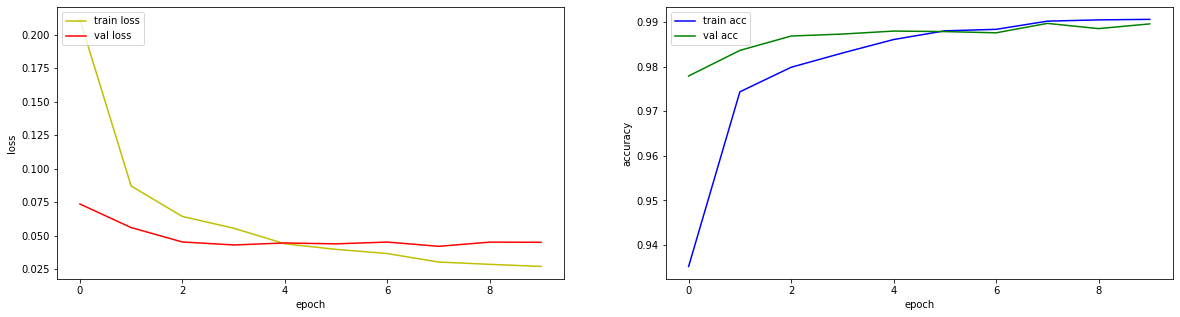

In [ ]:
import matplotlib.pyplot as plt

fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,5))

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
# visualization prediction vs label

In [ ]:
# split_ratio = 80
# train_ds, info = tfds.load('cats_vs_dogs', split=f'train[:{split_ratio}%]', as_supervised=True, with_info=True)
# val_ds, _ = tfds.load('cats_vs_dogs', split=f'train[{split_ratio}%:]', as_supervised=True, with_info=True)

In [ ]:
train_split = tfds.core.ReadInstruction(
    'train',
    from_=0,
    to=90,
    rounding='pct1_dropremainder',
    unit = '%',
)

val_split = tfds.core.ReadInstruction(
    'train',
    from_=90,
    to=100,
    rounding='pct1_dropremainder',
    unit = '%',
)

train_ds, info = tfds.load('cifar10', split=train_split, as_supervised=True, with_info=True)
val_ds, _ = tfds.load('cifar10', split=val_split, as_supervised=True, with_info=True)

In [ ]:
train_ds, info = tfds.load('cifar10', split='train', as_supervised=True, with_info=True)
val_ds, _ = tfds.load('cifar10', split='test', as_supervised=True, with_info=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incompleteYH2Q55/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incompleteYH2Q55/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.0,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [ ]:
for x in train_ds.take(1).enumerate():
  print(x)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, (<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [187, 153, 123],
        [186, 

In [ ]:
image_size = 56

def preprocessing(image, label):
  image = tf.image.resize(image, (image_size, image_size))
  image = tf.image.convert_image_dtype(image, tf.float16)
  image = image / 255.0

  return image, label

In [ ]:
train_ds = train_ds.map(preprocessing).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(preprocessing).batch(info.splits['test'].num_examples)

In [ ]:
train_ds

<DatasetV1Adapter shapes: ((None, 56, 56, 3), (None,)), types: (tf.float16, tf.int64)>

In [ ]:
for x in train_ds.take(1).enumerate():
  print(x)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, (<tf.Tensor: shape=(32, 56, 56, 3), dtype=float16, numpy=
array([[[[0.5605 , 0.3765 , 0.2744 ],
         [0.5576 , 0.3765 , 0.277  ],
         [0.553  , 0.3765 , 0.282  ],
         ...,
         [0.4116 , 0.1636 , 0.07117],
         [0.4094 , 0.1547 , 0.0756 ],
         [0.408  , 0.149  , 0.0784 ]],

        [[0.5396 , 0.3792 , 0.3054 ],
         [0.547  , 0.3892 , 0.3171 ],
         [0.558  , 0.4053 , 0.336  ],
         ...,
         [0.4214 , 0.1665 , 0.07916],
         [0.42   , 0.1583 , 0.08044],
         [0.4192 , 0.1532 , 0.08124]],

        [[0.5063 , 0.3838 , 0.3547 ],
         [0.5293 , 0.41   , 0.3809 ],
         [0.567  , 0.4514 , 0.4229 ],
         ...,
         [0.4373 , 0.171  , 0.092  ],
         [0.437  , 0.1642 , 0.08813],
         [0.437  , 0.1599 , 0.0857 ]],

        ...,

        [[0.736  , 0.5913 , 0.4612 ],
         [0.727  , 0.5815 , 0.4583 ],
         [0.7134 , 0.566  , 0.4539 ],
         ...,
         [0.808  , 0.6

In [ ]:
import tensorflow.keras as keras
 
input_shape = (image_size, image_size, 3)
num_class = 10
 
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                                  activation='relu',
                                  input_shape=input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_class, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
epochs = 10

In [ ]:
history1 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.0345 - accuracy: 0.1951 - val_loss: 1.8157 - val_accuracy: 0.2844
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8341 - accuracy: 0.2668 - val_loss: 1.7235 - val_accuracy: 0.3204
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.7511 - accuracy: 0.3069 - val_loss: 1.6325 - val_accuracy: 0.3514
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6638 - accuracy: 0.3420 - val_loss: 1.5859 - val_accuracy: 0.3784
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5970 - accuracy: 0.3837 - val_loss: 1.5994 - val_accuracy: 0.4069
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5331 - accuracy: 0.4172 - val_loss: 1.5448 - val_accuracy: 0.4382
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4755 - accuracy: 0.4473 - val_loss: 1.3957 -

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

epochs = 10
history2 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2289 - accuracy: 0.5495 - val_loss: 1.2770 - val_accuracy: 0.5426
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2003 - accuracy: 0.5592 - val_loss: 1.2608 - val_accuracy: 0.5520
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1833 - accuracy: 0.5668 - val_loss: 1.2658 - val_accuracy: 0.5574
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1705 - accuracy: 0.5697 - val_loss: 1.2635 - val_accuracy: 0.5514
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1528 - accuracy: 0.5779 - val_loss: 1.2534 - val_accuracy: 0.5581
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1437 - accuracy: 0.5797 - val_loss: 1.2643 - val_accuracy: 0.5538
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1308 - accuracy: 0.5832 - val_loss: 1.2586 -

In [ ]:
epochs = 20
history3 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0904 - accuracy: 0.5977 - val_loss: 1.2582 - val_accuracy: 0.5618
Epoch 2/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0822 - accuracy: 0.6008 - val_loss: 1.2634 - val_accuracy: 0.5619
Epoch 3/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0736 - accuracy: 0.6034 - val_loss: 1.2567 - val_accuracy: 0.5650
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0566 - accuracy: 0.6095 - val_loss: 1.2662 - val_accuracy: 0.5604
Epoch 5/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0564 - accuracy: 0.6095 - val_loss: 1.2597 - val_accuracy: 0.5623
Epoch 6/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0417 - accuracy: 0.6169 - val_loss: 1.2659 - val_accuracy: 0.5651
Epoch 7/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0328 - accuracy: 0.6188 - val_loss: 1.2716 -

In [ ]:
history = history1

for key in ['loss', 'val_loss', 'accuracy', 'val_accuracy']:
  history.history[key].extend(history2.history[key])
  history.history[key].extend(history3.history[key])

In [ ]:
len(history.history['loss'])

40

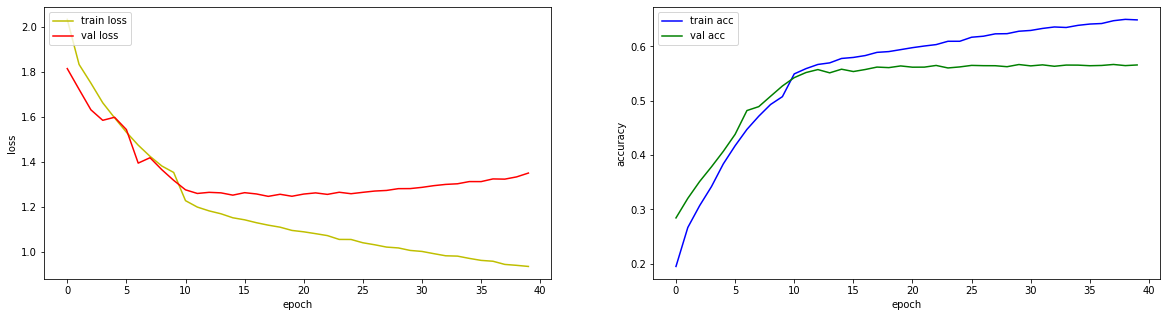

In [ ]:
import matplotlib.pyplot as plt

fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,5))

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

# Transfer Learning on CIFAR10

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.python.client import device_lib

In [ ]:
train_ds, info = tfds.load('cifar10', split='train', as_supervised=True, with_info=True)
val_ds, _ = tfds.load('cifar10', split='test', as_supervised=True, with_info=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incompleteVKF3CJ/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incompleteVKF3CJ/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.0. Subsequent calls will reuse this data.


In [ ]:
image_size = 112

def preprocessing(image, label):
  image = tf.image.resize(image, (image_size, image_size))
  image = tf.image.convert_image_dtype(image, tf.float16)
  image = image / 255.0

  return image, label

In [ ]:
train_ds = train_ds.map(preprocessing).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(preprocessing).batch(64)  

In [ ]:
import tensorflow.keras as keras

num_class = 10

model = tf.keras.applications.VGG16(include_top=False, input_shape=(image_size, image_size, 3))
model.trainable = False

# for layer in model.layers[:15]:
#       layer.trainable = False


model = keras.Sequential([
  model,
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024, activation='relu'),
  keras.layers.Dropout(0.5),  
  keras.layers.Dense(num_class, activation='softmax')
])

In [ ]:
 model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
 
 epochs = 30

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
782/782 [==============================] - 39s 50ms/step - loss: 1.5993 - accuracy: 0.4239 - val_loss: 1.0157 - val_accuracy: 0.6433
Epoch 2/30
782/782 [==============================] - 39s 50ms/step - loss: 1.0904 - accuracy: 0.6224 - val_loss: 0.8698 - val_accuracy: 0.7034
Epoch 3/30
782/782 [==============================] - 39s 50ms/step - loss: 0.9603 - accuracy: 0.6714 - val_loss: 0.8088 - val_accuracy: 0.7258
Epoch 4/30
782/782 [==============================] - 39s 50ms/step - loss: 0.8876 - accuracy: 0.6983 - val_loss: 0.7698 - val_accuracy: 0.7392
Epoch 5/30
782/782 [==============================] - 39s 50ms/step - loss: 0.8325 - accuracy: 0.7175 - val_loss: 0.7417 - val_accuracy: 0.7483
Epoch 6/30
782/782 [==============================] - 39s 50ms/step - loss: 0.7899 - accuracy: 0.7314 - val_loss: 0.7326 - val_accuracy: 0.7530
Epoch 7/30
782/782 [==============================] - 39s 50ms/step - loss: 0.7513 - accuracy: 0.7449 - val_loss: 0.7245 - val_accuracy:

In [ ]:
 model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
 
 epochs = 20

In [ ]:
history2 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
782/782 [==============================] - 39s 50ms/step - loss: 0.3034 - accuracy: 0.8947 - val_loss: 0.7491 - val_accuracy: 0.7840
Epoch 2/30
782/782 [==============================] - 39s 50ms/step - loss: 0.2977 - accuracy: 0.8942 - val_loss: 0.7538 - val_accuracy: 0.7851
Epoch 3/30
782/782 [==============================] - 39s 50ms/step - loss: 0.2952 - accuracy: 0.8971 - val_loss: 0.7566 - val_accuracy: 0.7838
Epoch 4/30
782/782 [==============================] - 39s 50ms/step - loss: 0.2889 - accuracy: 0.8988 - val_loss: 0.7639 - val_accuracy: 0.7843
Epoch 5/30
782/782 [==============================] - 39s 50ms/step - loss: 0.2843 - accuracy: 0.9013 - val_loss: 0.7659 - val_accuracy: 0.7851
Epoch 6/30
782/782 [==============================] - 39s 50ms/step - loss: 0.2825 - accuracy: 0.9023 - val_loss: 0.7658 - val_accuracy: 0.7857
Epoch 7/30
782/782 [==============================] - 39s 50ms/step - loss: 0.2744 - accuracy: 0.9046 - val_loss: 0.7726 - val_accuracy:

In [ ]:
for key in ['loss', 'val_loss', 'accuracy', 'val_accuracy']:
  history.history[key].extend(history2.history[key])

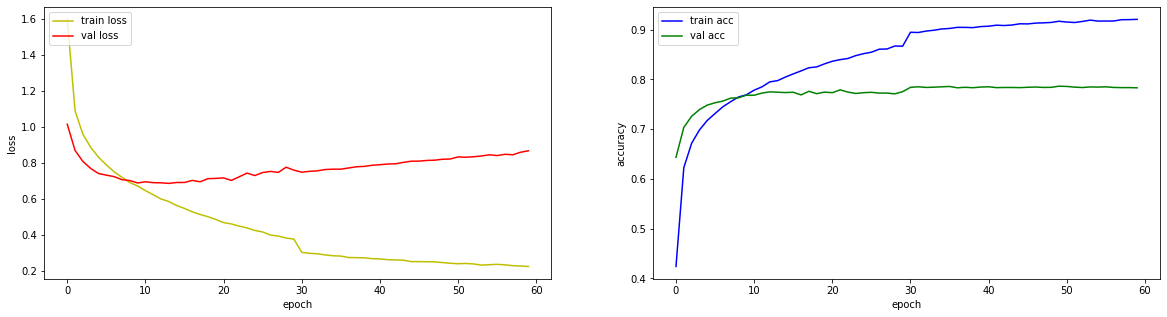

In [ ]:
import matplotlib.pyplot as plt

fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,5))

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

# Transfer Learning (CIFAR10) with partial CNN layers frozen

In [ ]:
import tensorflow.keras as keras

num_class = 10

model = tf.keras.applications.VGG16(include_top=False, input_shape=(image_size, image_size, 3))

for layer in model.layers[:15]:
      layer.trainable = False


model = keras.Sequential([
  model,
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024, activation='relu'),
  keras.layers.Dropout(0.5),  
  keras.layers.Dense(num_class, activation='softmax')
])

In [ ]:
 model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
 
 epochs = 10

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
782/782 [==============================] - 44s 56ms/step - loss: 1.1850 - accuracy: 0.5772 - val_loss: 0.6372 - val_accuracy: 0.7941
Epoch 2/10
782/782 [==============================] - 44s 56ms/step - loss: 0.5874 - accuracy: 0.8134 - val_loss: 0.5868 - val_accuracy: 0.8171
Epoch 3/10
782/782 [==============================] - 44s 56ms/step - loss: 0.4154 - accuracy: 0.8669 - val_loss: 0.5256 - val_accuracy: 0.8442
Epoch 4/10
782/782 [==============================] - 44s 56ms/step - loss: 0.2996 - accuracy: 0.9049 - val_loss: 0.5054 - val_accuracy: 0.8537
Epoch 5/10
782/782 [==============================] - 44s 56ms/step - loss: 0.2195 - accuracy: 0.9314 - val_loss: 0.5217 - val_accuracy: 0.8588
Epoch 6/10
782/782 [==============================] - 44s 56ms/step - loss: 0.1663 - accuracy: 0.9475 - val_loss: 0.5548 - val_accuracy: 0.8600
Epoch 7/10
782/782 [==============================] - 44s 56ms/step - loss: 0.1277 - accuracy: 0.9605 - val_loss: 0.5773 - val_accuracy:

In [ ]:
 model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
 
 epochs = 10

In [ ]:
history2 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
782/782 [==============================] - 44s 56ms/step - loss: 0.0232 - accuracy: 0.9937 - val_loss: 0.7186 - val_accuracy: 0.8766
Epoch 2/10
782/782 [==============================] - 44s 56ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.7922 - val_accuracy: 0.8785
Epoch 3/10
782/782 [==============================] - 44s 56ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.8461 - val_accuracy: 0.8794
Epoch 4/10
782/782 [==============================] - 44s 56ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.9117 - val_accuracy: 0.8793
Epoch 5/10
782/782 [==============================] - 44s 56ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.9780 - val_accuracy: 0.8788
Epoch 6/10
782/782 [==============================] - 44s 56ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 1.0205 - val_accuracy: 0.8792
Epoch 7/10
782/782 [==============================] - 44s 56ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.0447 - val_accuracy:

In [ ]:
 model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.000001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
 
 epochs = 10

In [ ]:
history3 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
782/782 [==============================] - 44s 56ms/step - loss: 6.2855e-04 - accuracy: 0.9998 - val_loss: 1.2119 - val_accuracy: 0.8796
Epoch 2/10
782/782 [==============================] - 44s 56ms/step - loss: 2.8382e-04 - accuracy: 1.0000 - val_loss: 1.2112 - val_accuracy: 0.8797
Epoch 3/10
782/782 [==============================] - 44s 56ms/step - loss: 2.8295e-04 - accuracy: 0.9999 - val_loss: 1.2199 - val_accuracy: 0.8805
Epoch 4/10
782/782 [==============================] - 44s 56ms/step - loss: 2.8007e-04 - accuracy: 0.9999 - val_loss: 1.2274 - val_accuracy: 0.8797
Epoch 5/10
782/782 [==============================] - 44s 56ms/step - loss: 3.8276e-04 - accuracy: 0.9999 - val_loss: 1.2351 - val_accuracy: 0.8798
Epoch 6/10
782/782 [==============================] - 44s 56ms/step - loss: 2.4956e-04 - accuracy: 1.0000 - val_loss: 1.2454 - val_accuracy: 0.8802
Epoch 7/10
782/782 [==============================] - 44s 56ms/step - loss: 2.4863e-04 - accuracy: 1.0000 - val_

In [ ]:
histories = [history2, history3]
metrics = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

for h in histories:
  for m in metrics:
    history.history[m].extend(h.history[m])

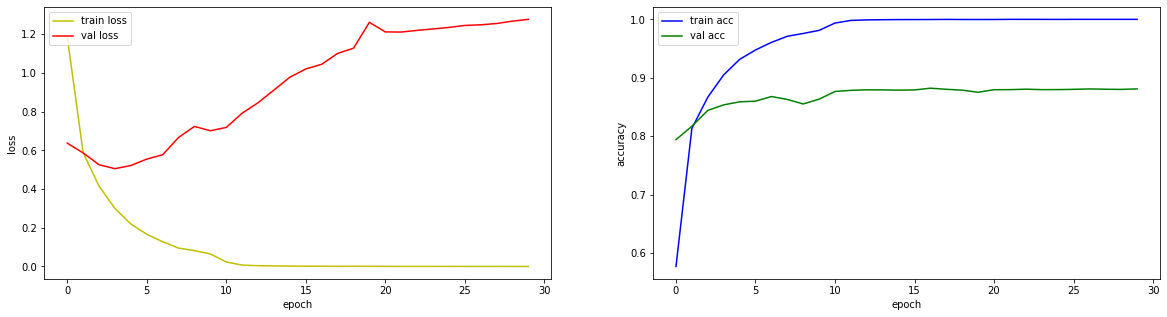

In [ ]:
import matplotlib.pyplot as plt

fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,5))

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

# Transfer Learning (Rock Paper Scissor)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.python.client import device_lib

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.00001,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
train_split = tfds.core.ReadInstruction(
    'train',
    from_=0,
    to=10,
    rounding='pct1_dropremainder',
    unit = '%',
)


train_ds, info = tfds.load('rock_paper_scissors', split=train_split, as_supervised=True, with_info=True)
val_ds, _ = tfds.load('rock_paper_scissors', split='test', as_supervised=True, with_info=True)

In [ ]:
image_size = 224

def preprocessing(image, label):
  image = tf.image.resize(image, (image_size, image_size))
  image = tf.image.convert_image_dtype(image, tf.float16)
  image = image / 255.0

  return image, label

In [ ]:
train_ds = train_ds.map(preprocessing).batch(128).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(preprocessing).batch(128)  

In [ ]:
import tensorflow.keras as keras

num_class = 3

model = tf.keras.applications.VGG16(include_top=False, input_shape=(image_size, image_size, 3))

print(len(model.layers))

for layer in model.layers[:15]:
      layer.trainable = False


model = keras.Sequential([
  model,
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024, activation='relu'),
  keras.layers.Dropout(0.5),  
  keras.layers.Dense(num_class, activation='softmax')
])

19


In [ ]:
model = tf.keras.applications.VGG16(include_top=False, input_shape=(image_size, image_size, 3)) 

for layer in model.layers:
  print(layer.name)

input_8
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
  def scheduler(epoch, learning_rate):
  if epoch % 10 == 0 and epoch != 0:
    print(f"learning rate decreased from {learning_rate} to {learning_rate * tf.math.exp(-0.1)}")
    return learning_rate * tf.math.exp(-0.1)
  else:
    return learning_rate

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
 
epochs = 30

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[callback])

Epoch 1/30
2/2 [==============================] - 2s 891ms/step - loss: 1.1672 - accuracy: 0.4000 - val_loss: 1.0666 - val_accuracy: 0.3414 - lr: 1.0000e-04
Epoch 2/30
2/2 [==============================] - 2s 829ms/step - loss: 1.1122 - accuracy: 0.4720 - val_loss: 1.0065 - val_accuracy: 0.3790 - lr: 1.0000e-04
Epoch 3/30
2/2 [==============================] - 2s 852ms/step - loss: 0.9377 - accuracy: 0.5800 - val_loss: 0.8813 - val_accuracy: 0.6237 - lr: 1.0000e-04
Epoch 4/30
2/2 [==============================] - 2s 827ms/step - loss: 0.8419 - accuracy: 0.6040 - val_loss: 0.7302 - val_accuracy: 0.9059 - lr: 1.0000e-04
Epoch 5/30
2/2 [==============================] - 2s 843ms/step - loss: 0.6781 - accuracy: 0.7680 - val_loss: 0.5598 - val_accuracy: 0.9301 - lr: 1.0000e-04
Epoch 6/30
2/2 [==============================] - 2s 842ms/step - loss: 0.5642 - accuracy: 0.8200 - val_loss: 0.3993 - val_accuracy: 0.9355 - lr: 1.0000e-04
Epoch 7/30
2/2 [==============================] - 2s 827ms

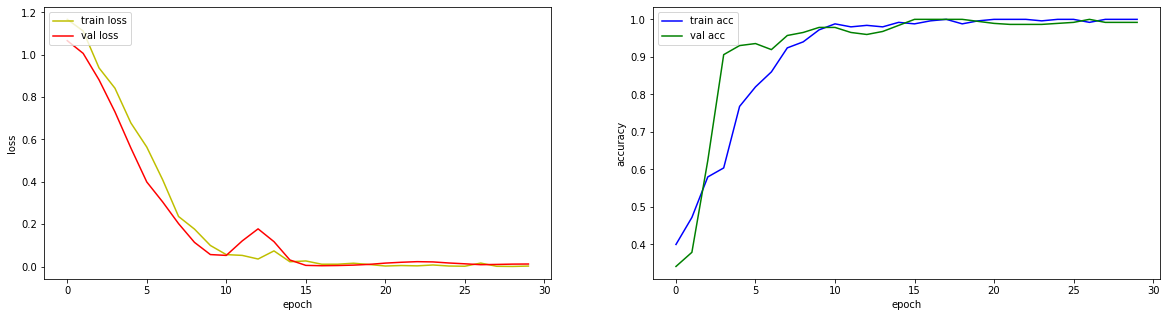

In [ ]:
import matplotlib.pyplot as plt

fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,5))

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()